In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [44]:
# Charger votre dataset ici
heart_data = pd.read_csv("../assets/data/heart.csv")

# Préparation des données
X = heart_data.drop("target", axis=1)
y = heart_data["target"]

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division du dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [45]:
# Modèles à entraîner
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbours": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Extreme Gradient Boost": XGBClassifier()
}

# Entraînement et évaluation des modèles
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)
    cross_val = cross_val_score(model, X_scaled, y, cv=5)
    model_results[name] = {
        "Accuracy": accuracy,
        "Report": report,
        "Confusion Matrix": confusion,
        "Cross-Validation Score": cross_val,
    }

# Affichage des résultats
for name, result in model_results.items():
    print(name, "\n")
    print("Accuracy:", result["Accuracy"], "\n")
    print("Report:", result["Report"], "\n")
    print("Confusion Matrix:", result["Confusion Matrix"], "\n")
    print("Cross-Validation Score:", result["Cross-Validation Score"], "\n")
    print("*" * 50, "\n")

Logistic Regression 

Accuracy: 0.8097560975609757 

Report:               precision    recall  f1-score   support

           0       0.89      0.70      0.78       100
           1       0.76      0.91      0.83       105

    accuracy                           0.81       205
   macro avg       0.82      0.81      0.81       205
weighted avg       0.82      0.81      0.81       205
 

Confusion Matrix: [[70 30]
 [ 9 96]] 

Cross-Validation Score: [0.88292683 0.85365854 0.86341463 0.82439024 0.80487805] 

************************************************** 

Naive Bayes 

Accuracy: 0.8292682926829268 

Report:               precision    recall  f1-score   support

           0       0.86      0.78      0.82       100
           1       0.81      0.88      0.84       105

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205
 

Confusion Matrix: [[78 22]
 [13 92]] 

Cross-Validati

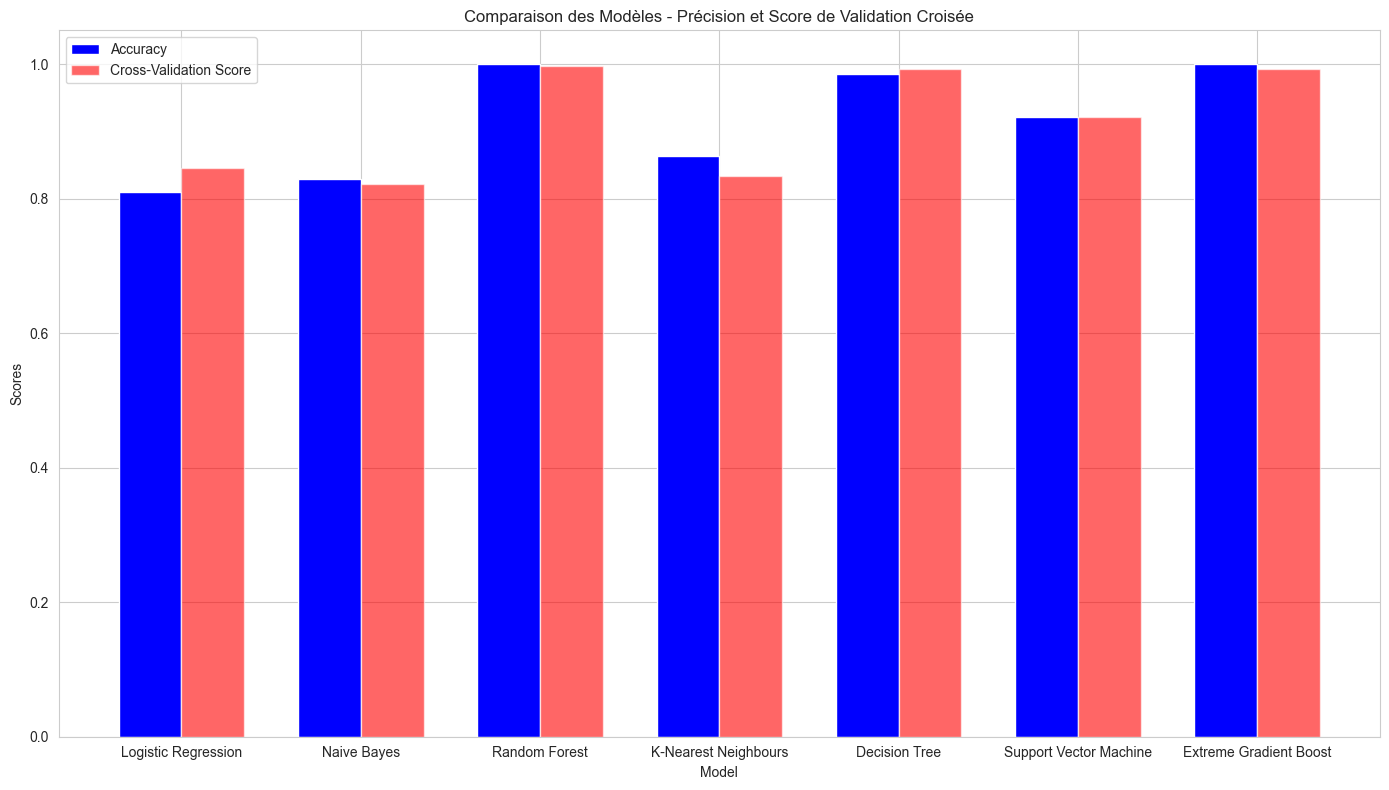

In [46]:
# Extraire la précision et la moyenne des scores de validation croisée pour chaque modèle
accuracies = [model_results[model]["Accuracy"] for model in model_results]
cross_val_scores = [
    sum(model_results[model]["Cross-Validation Score"])
    / len(model_results[model]["Cross-Validation Score"])
    for model in model_results
]
models = list(model_results.keys())

# Définir la largeur des barres pour les barres côte à côte
bar_width = 0.35
index = np.arange(len(models))

# Création du graphique
plt.figure(figsize=(14, 8))
bar1 = plt.bar(index, accuracies, bar_width, label="Accuracy", color="blue")
bar2 = plt.bar(
    index + bar_width,
    cross_val_scores,
    bar_width,
    label="Cross-Validation Score",
    color="red",
    alpha=0.6,
)

# Ajout des étiquettes et du titre
plt.xlabel("Model")
plt.ylabel("Scores")
plt.title("Comparaison des Modèles - Précision et Score de Validation Croisée")
plt.xticks(index + bar_width / 2, models)
plt.legend()

# Affichage du graphique
plt.tight_layout()
plt.show()